In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

/home/dilusha/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [28]:
df = pd.read_csv('BABD-13.csv')

In [5]:
y = df.label
X = df.drop('label', axis=1).drop('account', axis=1).drop('SW', axis=1)

X_PAI = X.iloc[:, 0:38]       # PAI
X_PDI = X.iloc[:, 38:52]      # PDI
X_PTI = X.iloc[:, 52:65]      # PTI
X_CI = X.iloc[:, 65:132]      # CI
X_SI = X.iloc[:, 0:132]         # SI
X_LSI = X.iloc[:, 132:148]      # LSI

X_KNN = X.iloc[:, np.r_[1:8, 9:11, 13, 15, 26, 38:45, 48:52, 53, 57, 66:68, 72, 132:148]]
X_RF = X.iloc[:, np.r_[1:10, 20:25, 40, 54, 60:62, 91, 96, 105:107, 132:148]]
X_XGB = X.iloc[:, np.r_[1:10, 20:25, 40, 54, 60:62, 91, 96, 105:107, 132:148]]

In [6]:
X_PAI.head()

,PAIa11-1,PAIa11-2,PAIa12,PAIa13,PAIa14-1,PAIa14-2,PAIa14-3,PAIa14-4,PAIa14-R1,PAIa14-R2,...,PAIa21-3,PAIa21-4,PAIa21-R1,PAIa21-R2,PAIa21-R3,PAIa21-R4,PAIa22-1,PAIa22-2,PAIa22-R1,PAIa22-R2
0,0.024182,0.000000,-0.024182,0.0,0.001000,0.021682,0.000000,0.000000,0.001000,0.021682,...,0.0,0.0,0.04135,0.89662,0.0,0.0,0.398393,0.0,0.398393,0.0
1,0.217012,0.000000,-0.217012,0.0,0.000005,0.037723,0.000000,0.000000,0.000005,0.037723,...,0.0,0.0,0.00003,0.17383,0.0,0.0,0.034496,0.0,0.034496,0.0
2,0.067596,0.000000,-0.067596,0.0,0.000278,0.037200,0.000000,0.000000,0.000278,0.037200,...,0.0,0.0,0.00412,0.55033,0.0,0.0,0.236688,0.0,0.236688,0.0
3,0.000095,0.000000,-0.000095,0.0,0.000041,0.000054,0.000000,0.000000,0.000041,0.000054,...,0.0,0.0,0.43372,0.56628,0.0,0.0,0.066280,0.0,0.066280,0.0
4,25.000993,25.000993,0.000000,1.0,25.000993,25.000993,25.000993,25.000993,25.000993,25.000993,...,1.0,1.0,1.00000,1.00000,1.0,1.0,0.000000,0.0,0.000000,0.0


In [7]:
X_LSI.head()

,S1-1,S1-2,S1-3,S1-4,S1-5,S1-6,S2-1,S2-2,S2-3,S3,S4,S5,S6,S7,S8,S9
0,1.999334,0.908074,0.999667,0.418790,0.999667,0.489582,1256,1469,2725,-0.294983,0.00000,1.999223,3,0.000000,0.000247,0.000333
1,2.000000,0.335985,1.000000,0.031528,1.000000,0.334707,95,1,95,-0.161792,0.00000,1.442318,2,0.000000,0.022733,0.000333
2,2.047302,0.617632,1.023651,0.351308,1.023651,0.271846,986,765,1751,-0.211953,0.00000,2.000842,3,0.000000,0.000309,0.000341
3,1.833333,0.230740,0.916667,0.142319,0.916667,0.219163,2,1,2,-0.081717,0.00000,2.000000,4,0.000000,0.174270,0.083333
4,2.000000,0.288275,1.000000,0.166436,1.000000,0.166436,6,5,11,-0.023318,0.06006,3.524528,8,0.307692,0.046156,0.027027


In [8]:
X_RF.head()

,PAIa11-2,PAIa12,PAIa13,PAIa14-1,PAIa14-2,PAIa14-3,PAIa14-4,PAIa14-R1,PAIa14-R2,PAIa17-1,...,S2-1,S2-2,S2-3,S3,S4,S5,S6,S7,S8,S9
0,0.000000,-0.024182,0.0,0.001000,0.021682,0.000000,0.000000,0.001000,0.021682,0.009634,...,1256,1469,2725,-0.294983,0.00000,1.999223,3,0.000000,0.000247,0.000333
1,0.000000,-0.217012,0.0,0.000005,0.037723,0.000000,0.000000,0.000005,0.037723,0.007486,...,95,1,95,-0.161792,0.00000,1.442318,2,0.000000,0.022733,0.000333
2,0.000000,-0.067596,0.0,0.000278,0.037200,0.000000,0.000000,0.000278,0.037200,0.015999,...,986,765,1751,-0.211953,0.00000,2.000842,3,0.000000,0.000309,0.000341
3,0.000000,-0.000095,0.0,0.000041,0.000054,0.000000,0.000000,0.000041,0.000054,0.000006,...,2,1,2,-0.081717,0.00000,2.000000,4,0.000000,0.174270,0.083333
4,25.000993,0.000000,1.0,25.000993,25.000993,25.000993,25.000993,25.000993,25.000993,0.000000,...,6,5,11,-0.023318,0.06006,3.524528,8,0.307692,0.046156,0.027027


In [ ]:
# R1- totall minimum
# R2- totall maximum

In [9]:
X_RF.columns

Index(['PAIa11-2', 'PAIa12', 'PAIa13', 'PAIa14-1', 'PAIa14-2', 'PAIa14-3',
       'PAIa14-4', 'PAIa14-R1', 'PAIa14-R2', 'PAIa17-1', 'PAIa17-2',
       'PAIa17-3', 'PAIa17-R1', 'PAIa17-R2', 'PDIa1-3', 'PTIa21', 'PTIa41-1',
       'PTIa41-2', 'CI3a11-2', 'CI3a21-1', 'CI3a23-1', 'CI3a23-2', 'S1-1',
       'S1-2', 'S1-3', 'S1-4', 'S1-5', 'S1-6', 'S2-1', 'S2-2', 'S2-3', 'S3',
       'S4', 'S5', 'S6', 'S7', 'S8', 'S9'],
      dtype='object')

In [29]:
data = df.drop('account', axis=1).drop('SW', axis=1)

In [4]:
data.head()

,PAIa11-1,PAIa11-2,PAIa12,PAIa13,PAIa14-1,PAIa14-2,PAIa14-3,PAIa14-4,PAIa14-R1,PAIa14-R2,...,S2-2,S2-3,S3,S4,S5,S6,S7,S8,S9,label
0,0.024182,0.000000,-0.024182,0.0,0.001000,0.021682,0.000000,0.000000,0.001000,0.021682,...,1469,2725,-0.294983,0.00000,1.999223,3,0.000000,0.000247,0.000333,0
1,0.217012,0.000000,-0.217012,0.0,0.000005,0.037723,0.000000,0.000000,0.000005,0.037723,...,1,95,-0.161792,0.00000,1.442318,2,0.000000,0.022733,0.000333,0
2,0.067596,0.000000,-0.067596,0.0,0.000278,0.037200,0.000000,0.000000,0.000278,0.037200,...,765,1751,-0.211953,0.00000,2.000842,3,0.000000,0.000309,0.000341,0
3,0.000095,0.000000,-0.000095,0.0,0.000041,0.000054,0.000000,0.000000,0.000041,0.000054,...,1,2,-0.081717,0.00000,2.000000,4,0.000000,0.174270,0.083333,0
4,25.000993,25.000993,0.000000,1.0,25.000993,25.000993,25.000993,25.000993,25.000993,25.000993,...,5,11,-0.023318,0.06006,3.524528,8,0.307692,0.046156,0.027027,0


In [5]:
data.shape

(544462, 149)

In [32]:
data.label

0          0
1          0
2          0
3          0
4          0
          ..
544457    12
544458    12
544459    12
544460    12
544461    12
Name: label, Length: 544462, dtype: int64

In [33]:
df_label = pd.DataFrame(data = data.label, columns = ['label'], index = data.index)

In [35]:
df_label.label.value_counts()

3     300000
6     105257
1      91617
2      13861
11     12412
5       9309
0       8686
10      1580
12      1502
4        180
7         27
8         16
9         15
Name: label, dtype: int64

In [23]:
X = data.drop('label', axis=1)

In [8]:


# Scaling the features is generally a good idea for KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
from sklearn.cluster import KMeans

In [10]:
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters)
data['cluster'] = kmeans.fit_predict(X_scaled)

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

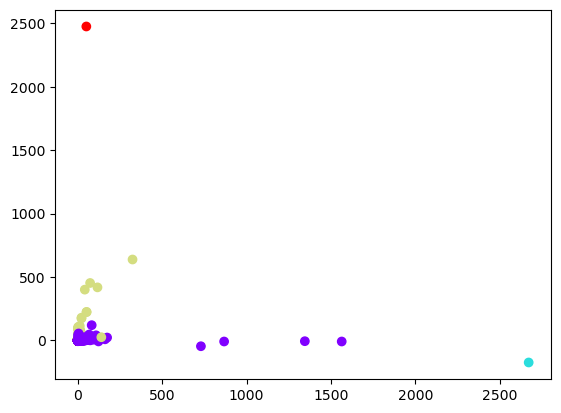

In [13]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=data['cluster'], cmap='rainbow')
plt.show()

In [37]:
X1 = data.drop('label', axis=1)

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

In [44]:
n_clusters = 7

kmeans = KMeans(n_clusters=n_clusters)
df_label['cluster'] = kmeans.fit_predict(X_scaled)

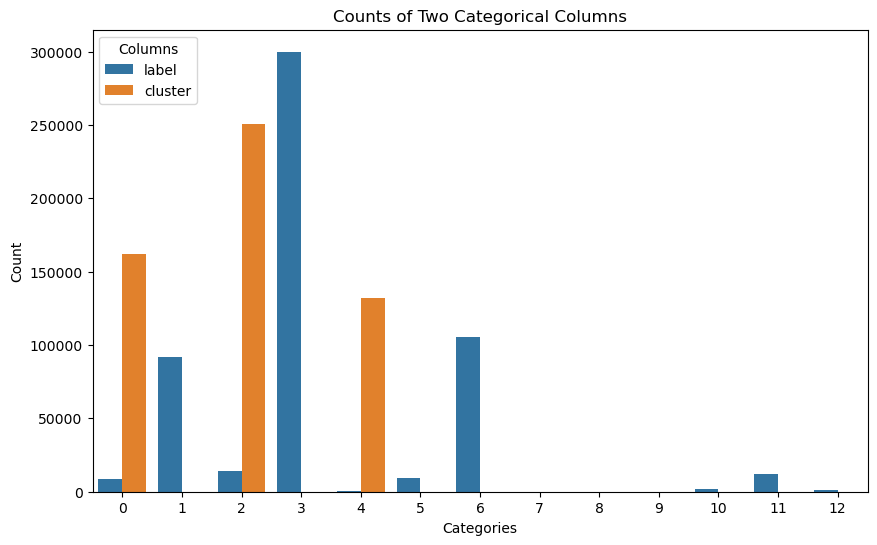

In [45]:
import seaborn as sns

# Melt dataframe to long format for seaborn
df_melted = pd.melt(df_label)

plt.figure(figsize=(10,6))
sns.countplot(data=df_melted, x='value', hue='variable')
plt.title('Counts of Two Categorical Columns')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.legend(title='Columns')

plt.show()


In [46]:
df_label.cluster.value_counts()

2    250717
0    161947
4    131786
6         7
5         3
1         1
3         1
Name: cluster, dtype: int64

In [51]:
df_label[df_label.cluster == 2].label.value_counts()

6     82688
3     79267
1     68927
11     8081
5      6246
0      3404
10     1444
12      494
4        90
2        49
8        13
7        11
9         3
Name: label, dtype: int64

In [52]:
df_label[df_label.cluster == 0].label.value_counts()

3     107984
6      21869
1      18856
0       4608
11      4064
5       2682
12       910
2        734
10       133
4         80
7         13
9         11
8          3
Name: label, dtype: int64

In [53]:
df_label[df_label.cluster == 4].label.value_counts()

3     112749
2      13078
1       3834
6        700
0        664
5        381
11       267
12        97
4          9
7          3
10         3
9          1
Name: label, dtype: int64

0 - Blackmail: This includes ransomware, sextortion, and scams where victims are threatened or deceived to pay a certain amount of cryptocurrency to specific addresses.
1 - Cyber-Security Service: Providers offer services like payment gateways, VPNs, etc., and accept only cryptocurrency as payment.
2 - Darknet Market: Markets on the darknet where illegal items and services are traded using cryptocurrencies.
3 - Centralized Exchange: Intermediaries that allow cryptocurrency trading and swaps between cryptocurrency and fiat.
4 - P2P Financial Infrastructure Service: P2P financial activities conducted solely by cryptocurrency.
5 - P2P Financial Service: Services that reward users in cryptocurrency for completing specific tasks.
6 - Gambling: Casino games where wagers are made using cryptocurrencies.
7 - Government Criminal Blacklist: Addresses suspected or confirmed to be involved in criminal activities.
8 - Money Laundering: Trading dirty cryptocurrency in complicated ways to make it hard to trace.
9 - Ponzi Scheme: Schemes where early investors are paid using the investments of newer participants.
10 - Mining Pool: Groups of miners who pool their computational resources to increase the chances of finding a new block and earning cryptocurrency rewards.
11 - Tumbler: Services that increase the anonymity of cryptocurrency transactions.
12 - Individual Wallet: Wallets owned by ordinary people for everyday transactions.

In [57]:
df_label.shape[0]

544462

In [59]:
(df_label.label.value_counts() / df_label.shape[0])

3     0.551003
6     0.193323
1     0.168271
2     0.025458
11    0.022797
5     0.017098
0     0.015953
10    0.002902
12    0.002759
4     0.000331
7     0.000050
8     0.000029
9     0.000028
Name: label, dtype: float64